<a href="https://colab.research.google.com/github/Jefferson-Luis/Data-Science-com-Python/blob/main/Data_Science_com_Python_Modulo3_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 3 - Aula 2: Missings







## 2.4 Manejo dos NAs e NaN


In [ ]:
!pip install datetime
!pip install matplotlib plotly
!pip install yfinance quandl
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Importação de dados financeiros
import yfinance as yf
import quandl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tickers_IBOV = ['ABCB4','BBAS3','BBDC4','BPAN4','BTOW3','CGAS3','CMIG4','CSNA3','CYRE3','ELET3','ELPL4','ENBR3','EQTL3','EZTC3','FIBR3','GOAU4','HGTX3','ITUB4','LAME4','LREN3','MRVE3','MYPK3','PETR4','POMO4','QGEP3','RAPT4','SAPR4','SBSP3','SUZB5','TUPY3','USIM5','VALE5','WEGE3']

In [ ]:

ativo_SA = 0
tickers_IBOV_SA = []

for i in tickers_IBOV: 
  ativo_SA = (i +'.SA')
  tickers_IBOV_SA.append(ativo_SA)

tickers_IBOV_SA

['ABCB4.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BTOW3.SA',
 'CGAS3.SA',
 'CMIG4.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ELET3.SA',
 'ELPL4.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FIBR3.SA',
 'GOAU4.SA',
 'HGTX3.SA',
 'ITUB4.SA',
 'LAME4.SA',
 'LREN3.SA',
 'MRVE3.SA',
 'MYPK3.SA',
 'PETR4.SA',
 'POMO4.SA',
 'QGEP3.SA',
 'RAPT4.SA',
 'SAPR4.SA',
 'SBSP3.SA',
 'SUZB5.SA',
 'TUPY3.SA',
 'USIM5.SA',
 'VALE5.SA',
 'WEGE3.SA']

In [ ]:
yf.download(tickers_IBOV_SA, start = '2022-02-01', end='2022-02-18', period ='1d')
cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-03-10', period = '1d')
cotacoes_IBOV


[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- SUZB5.SA: No data found for this date range, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- FIBR3.SA: No data found for this date range, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted
- ELPL4.SA: No data found for this date range, symbol may be delisted
- BTOW3.SA: No data found, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
[*********************100%***********************]  33 of 33 completed

8 Failed downloads:
- SUZB5.SA: No data found for this date range, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- FIBR3.SA: No data found for this date range, symbol may be delisted
- VALE5.SA: No data found for this date range, symbol may be delisted
- QGEP3.SA: No data found, symbol may be delisted
- ELPL4.SA: No data found 

Adj Close                                            \
                      ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA   
Date                                                                       
2022-02-10 00:00:00  15.719163  31.190599  19.081697   9.918128      NaN   
2022-02-11 00:00:00  16.210079  32.282806  19.145092   9.918128      NaN   
2022-02-14 00:00:00  16.200260  32.418121  19.172264   9.997872      NaN   
2022-02-15 00:00:00  16.642086  33.954937  19.190376  11.044509      NaN   
2022-02-16 00:00:00  16.612631  34.148251  19.416784  11.094349      NaN   
2022-02-17 00:00:00  16.386810  34.148251  19.190376  11.253837      NaN   
2022-02-18 00:00:00  16.278807  34.844162  19.299051  10.645791      NaN   
2022-02-21 00:00:00  15.601342  34.099918  19.072643  10.167328      NaN   
2022-02-22 00:00:00  15.640615  34.418880  19.000191  10.187264      NaN   
2022-02-23 00:00:00  16.102077  34.592861  18.909630   9.958000      NaN   
2022-02-24 00:00:00  15.650434  33.490993  18.339079  10.097552      NaN   
2022-02-25 00:00:00  15.316610  34.032257  18.429644   9.977937      NaN   
2022-03-02 00:00:00  15.090789  34.409214  18.239458   9.987905      NaN   
2022-03-03 00:00:00  15.375520  34.413033  18.591879  10.017809      NaN   
2022-03-04 00:00:00  15.139880  33.551964  18.057058   9.938065      NaN   
2022-03-07 00:00:00  15.041697  32.116848  17.594753   9.748672      NaN   
2022-03-08 00:00:00  15.287155  32.364285  17.821371  10.107520      NaN   
2022-03-09 00:00:00  15.836982  34.195286  18.963535  10.875053      NaN   

                                                                            \
                       CGAS3.SA  CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA   
Date                                                                         
2022-02-10 00:00:00  129.387848  8.994845  27.753717  15.173447  33.364914   
2022-02-11 00:00:00  123.416100  8.917966  27.360188  15.260041  32.717052   
2022-02-14 00:00:00  123.416100  8.827108  27.291319  15.317772  32.805393   
2022-02-15 00:00:00  123.416100  9.001834  25.972994  15.972049  34.847141   
2022-02-16 00:00:00  124.510918  9.183548  26.081215  16.010534  34.523209   
2022-02-17 00:00:00  124.510918  9.064734  24.556284  15.606423  34.533028   
2022-02-18 00:00:00  124.510918  9.099679  24.241459  15.625667  34.012775   
2022-02-21 00:00:00  124.510918  8.924954  24.339842  15.134959  33.237305   
2022-02-22 00:00:00  124.510918  8.903989  24.507093  15.144581  33.482704   
2022-02-23 00:00:00  124.510918  9.106668  23.316666  14.855929  34.199280   
2022-02-24 00:00:00  124.510918  8.931944  23.119900  14.817443  33.178406   
2022-02-25 00:00:00  122.430763  8.945922  24.694021  14.605765  34.130569   
2022-03-02 00:00:00  122.430763  9.204515  26.691185  14.297870  33.865532   
2022-03-03 00:00:00  122.430763  9.267416  28.029188  14.336357  34.444683   
2022-03-04 00:00:00  122.430763  9.078712  28.530939  13.864893  34.052036   
2022-03-07 00:00:00  122.430763  8.589483  28.471910  13.027803  32.275326   
2022-03-08 00:00:00  122.430763  8.750230  27.104391  13.268347  32.697418   
2022-03-09 00:00:00  122.430763  9.085702  27.517599  14.038084  34.297440   

                     ...    Volume                                      \
                     ...  POMO4.SA QGEP3.SA RAPT4.SA SAPR4.SA SBSP3.SA   
Date                 ...                                                 
2022-02-10 00:00:00  ...   4230200      NaN  1605300  1717700  1353100   
2022-02-11 00:00:00  ...   6280500      NaN  2563000  4382600  2420100   
2022-02-14 00:00:00  ...   2522200      NaN  1526200  2064900  2170800   
2022-02-15 00:00:00  ...   2835000      NaN  1796800  1641500  1548800   
2022-02-16 00:00:00  ...   2579800      NaN  2243400  2166600  1986200   
2022-02-17 00:00:00  ...   4627100      NaN  2103100  1317000  3942000   
2022-02-18 00:00:00  ...   2728500      NaN  1376300  2944300  2972900   
2022-02-21 00:00:00  ...   2989300      NaN  

In [ ]:
cotacoes_IBOV.isna()

Adj Close                                               \
                     ABCB4.SA BBAS3.SA BBDC4.SA BPAN4.SA BTOW3.SA CGAS3.SA   
Date                                                                         
2022-02-10 00:00:00     False    False    False    False     True    False   
2022-02-11 00:00:00     False    False    False    False     True    False   
2022-02-14 00:00:00     False    False    False    False     True    False   
2022-02-15 00:00:00     False    False    False    False     True    False   
2022-02-16 00:00:00     False    False    False    False     True    False   
2022-02-17 00:00:00     False    False    False    False     True    False   
2022-02-18 00:00:00     False    False    False    False     True    False   
2022-02-21 00:00:00     False    False    False    False     True    False   
2022-02-22 00:00:00     False    False    False    False     True    False   
2022-02-23 00:00:00     False    False    False    False     True    False   
2022-02-24 00:00:00     False    False    False    False     True    False   
2022-02-25 00:00:00     False    False    False    False     True    False   
2022-03-02 00:00:00     False    False    False    False     True    False   
2022-03-03 00:00:00     False    False    False    False     True    False   
2022-03-04 00:00:00     False    False    False    False     True    False   
2022-03-07 00:00:00     False    False    False    False     True    False   
2022-03-08 00:00:00     False    False    False    False     True    False   
2022-03-09 00:00:00     False    False    False    False     True    False   

                                                         ...   Volume  \
                    CMIG4.SA CSNA3.SA CYRE3.SA ELET3.SA  ... POMO4.SA   
Date                                                     ...            
2022-02-10 00:00:00    False    False    False    False  ...    False   
2022-02-11 00:00:00    False    False    False    False  ...    False   
2022-02-14 00:00:00    False    False    False    False  ...    False   
2022-02-15 00:00:00    False    False    False    False  ...    False   
2022-02-16 00:00:00    False    False    False    False  ...    False   
2022-02-17 00:00:00    False    False    False    False  ...    False   
2022-02-18 00:00:00    False    False    False    False  ...    False   
2022-02-21 00:00:00    False    False    False    False  ...    False   
2022-02-22 00:00:00    False    False    False    False  ...    False   
2022-02-23 00:00:00    False    False    False    False  ...    False   
2022-02-24 00:00:00    False    False    False    False  ...    False   
2022-02-25 00:00:00    False    False    False    False  ...    False   
2022-03-02 00:00:00    False    False    False    False  ...    False   
2022-03-03 00:00:00    False    False    False    False  ...    False   
2022-03-04 00:00:00    False    False    False    False  ...    False   
2022-03-07 00:00:00    False    False    False    False  ...    False   
2022-03-08 00:00:00    False    False    False    False  ...    False   
2022-03-09 00:00:00    False    False    False    False  ...    False   

                                                                           \
                    QGEP3.SA RAPT4.SA SAPR4.SA SBSP3.SA SUZB5.SA TUPY3.SA   
Date                                                                        
2022-02-10 00:00:00     True    False    False    False     True    False   
2022-02-11 00:00:00     True    False    False    False     True    False   
2022-02-14 00:00:00     True    False    False    False     True    False   
2022-02-15 00:00:00     True    False    False    False     True    False   
2022-02-16 00:00:00     True    False    False    False     True    False   
2022-02-17 00:00:00     True    False    False    False     True    False   
2022-02-18 00:00:00     True    False    False    False     True    False   
2022-02-21 00:00:00     True    False    False    False     True    False   


In [ ]:
# O método isna() retorna um booleano(True/False). Como vimos, no Python o True equivale a 1 e False equivale a 0.
# Se eu somar uma coluna/linha composta por True/False eu consigo saber qts True existem ( e nesse caso do .isna, saber qts NaS exemtem)
# O método sum() = sum(0), já que 0 é o default do método e representa a soma de todas as células de uma coluna. Se colocarmos sum(1), teremos a soma de todas as celulas de uma linha


count_null = cotacoes_IBOV.isna().sum()
count_null

# O output a seguir me mostra que existe 0 NA na coluna de Adj Close ( podemos checar a data logo abaixo pra ver pq isso aconteceu com todos os ativos)
# Já BTOW3.SA possui 6 célular com NA. Começou a ser negociada no IBOV recentemente

Adj Close  ABCB4.SA     0
           BBAS3.SA     0
           BBDC4.SA     0
           BPAN4.SA     0
           BTOW3.SA    18
                       ..
Volume     SUZB5.SA    18
           TUPY3.SA     0
           USIM5.SA     0
           VALE5.SA    18
           WEGE3.SA     0
Length: 198, dtype: int64

In [ ]:
# Soma dos NAs por linhas. Lembrando que uma linha é composta por 6 índices 0 (Adj Close','Close','High','Low','Open','Volume)
count_null_linha = cotacoes_IBOV.isna().sum(1)
count_null_linha

Date
2022-02-10    48
2022-02-11    48
2022-02-14    48
2022-02-15    48
2022-02-16    48
2022-02-17    48
2022-02-18    48
2022-02-21    48
2022-02-22    48
2022-02-23    48
2022-02-24    48
2022-02-25    48
2022-03-02    48
2022-03-03    48
2022-03-04    48
2022-03-07    48
2022-03-08    48
2022-03-09    48
dtype: int64

In [ ]:
# Método shape retorna o número de linhas e coluna de um dataframe

cotacoes_IBOV.shape

(18, 198)

In [ ]:
cotacoes_IBOV.shape[1]

198

In [ ]:
# Duas formas de obter o número de colunas 

print(cotacoes_IBOV.shape[1])
len(cotacoes_IBOV.columns)

198


198

In [ ]:
# Usando as informações do shape e do isna, podemos fazer um filtro para retornar quais linhas (cotacoes_IBOV.shape[0]
# ou colunas cotacoes_IBOV.shape[1] possuem uma fração específica de NAs

# No exemplo, exibir as linhas onde temos pelo menos 1 NA

cotacoes_IBOV[cotacoes_IBOV.isna().sum(1) > 0 ]


Adj Close                                            \
                      ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA BTOW3.SA   
Date                                                                       
2022-02-10 00:00:00  15.719163  31.190601  19.081697   9.918128      NaN   
2022-02-11 00:00:00  16.210079  32.282806  19.145094   9.918128      NaN   
2022-02-14 00:00:00  16.200260  32.418121  19.172262   9.997872      NaN   
2022-02-15 00:00:00  16.642086  33.954937  19.190374  11.044509      NaN   
2022-02-16 00:00:00  16.612631  34.148247  19.416782  11.094349      NaN   
2022-02-17 00:00:00  16.386810  34.148247  19.190374  11.253837      NaN   
2022-02-18 00:00:00  16.278807  34.844162  19.299051  10.645791      NaN   
2022-02-21 00:00:00  15.601342  34.099918  19.072641  10.167328      NaN   
2022-02-22 00:00:00  15.640615  34.418877  19.000191  10.187264      NaN   
2022-02-23 00:00:00  16.102077  34.592861  18.909628   9.958000      NaN   
2022-02-24 00:00:00  15.650434  33.490993  18.339079  10.097552      NaN   
2022-02-25 00:00:00  15.316610  34.032257  18.429644   9.977937      NaN   
2022-03-02 00:00:00  15.090789  34.409214  18.239460   9.987905      NaN   
2022-03-03 00:00:00  15.375520  34.413033  18.591879  10.017809      NaN   
2022-03-04 00:00:00  15.139880  33.551964  18.057056   9.938065      NaN   
2022-03-07 00:00:00  15.041697  32.116852  17.594753   9.748672      NaN   
2022-03-08 00:00:00  15.287155  32.364285  17.821371  10.107520      NaN   
2022-03-09 00:00:00  15.836982  34.195290  18.963535  10.875053      NaN   

                                                                            \
                       CGAS3.SA  CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA   
Date                                                                         
2022-02-10 00:00:00  129.387848  8.994844  27.753717  15.173447  33.364914   
2022-02-11 00:00:00  123.416100  8.917966  27.360188  15.260041  32.717052   
2022-02-14 00:00:00  123.416100  8.827107  27.291319  15.317772  32.805393   
2022-02-15 00:00:00  123.416100  9.001834  25.972994  15.972049  34.847141   
2022-02-16 00:00:00  124.510918  9.183548  26.081215  16.010534  34.523209   
2022-02-17 00:00:00  124.510918  9.064735  24.556284  15.606423  34.533028   
2022-02-18 00:00:00  124.510918  9.099680  24.241459  15.625667  34.012775   
2022-02-21 00:00:00  124.510918  8.924954  24.339842  15.134959  33.237305   
2022-02-22 00:00:00  124.510918  8.903988  24.507093  15.144581  33.482704   
2022-02-23 00:00:00  124.510918  9.106668  23.316666  14.855929  34.199280   
2022-02-24 00:00:00  124.510918  8.931943  23.119900  14.817443  33.178406   
2022-02-25 00:00:00  122.430763  8.945922  24.694021  14.605765  34.130569   
2022-03-02 00:00:00  122.430763  9.204515  26.691185  14.297870  33.865532   
2022-03-03 00:00:00  122.430763  9.267417  28.029188  14.336357  34.444683   
2022-03-04 00:00:00  122.430763  9.078712  28.530939  13.864893  34.052036   
2022-03-07 00:00:00  122.430763  8.589483  28.471910  13.027803  32.275326   
2022-03-08 00:00:00  122.430763  8.750230  27.104391  13.268347  32.697418   
2022-03-09 00:00:00  122.430763  9.085702  27.517599  14.038084  34.297440   

                     ...    Volume                                      \
                     ...  POMO4.SA QGEP3.SA RAPT4.SA SAPR4.SA SBSP3.SA   
Date                 ...                                                 
2022-02-10 00:00:00  ...   4230200      NaN  1605300  1717700  1353100   
2022-02-11 00:00:00  ...   6280500      NaN  2563000  4382600  2420100   
2022-02-14 00:00:00  ...   2522200      NaN  1526200  2064900  2170800   
2022-02-15 00:00:00  ...   2835000      NaN  1796800  1641500  1548800   
2022-02-16 00:00:00  ...   2579800      NaN  2243400  2166600  1986200   
2022-02-17 00:00:00  ...   4627100      NaN  2103100  1317000  3942000   
2022-02-18 00:00:00  ...   2728500      NaN  1376300  2944300  2972900   
2022-02-21 00:00:00  ...   2989300      NaN  

In [ ]:
cotacoes_IBOV[cotacoes_IBOV.isna().sum(1) > 0 ].head(3)

Adj Close                                           \
                      ABCB4.SA   BBAS3.SA   BBDC4.SA  BPAN4.SA BTOW3.SA   
Date                                                                      
2022-02-10 00:00:00  15.719163  31.190601  19.081697  9.918128      NaN   
2022-02-11 00:00:00  16.210079  32.282806  19.145094  9.918128      NaN   
2022-02-14 00:00:00  16.200260  32.418121  19.172262  9.997872      NaN   

                                                                            \
                       CGAS3.SA  CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA   
Date                                                                         
2022-02-10 00:00:00  129.387848  8.994844  27.753717  15.173447  33.364914   
2022-02-11 00:00:00  123.416100  8.917966  27.360188  15.260041  32.717052   
2022-02-14 00:00:00  123.416100  8.827107  27.291319  15.317772  32.805393   

                     ...   Volume                                      \
                     ... POMO4.SA QGEP3.SA RAPT4.SA SAPR4.SA SBSP3.SA   
Date                 ...                                                
2022-02-10 00:00:00  ...  4230200      NaN  1605300  1717700  1353100   
2022-02-11 00:00:00  ...  6280500      NaN  2563000  4382600  2420100   
2022-02-14 00:00:00  ...  2522200      NaN  1526200  2064900  2170800   

                                                                    
                    SUZB5.SA TUPY3.SA  USIM5.SA VALE5.SA  WEGE3.SA  
Date                                                                
2022-02-10 00:00:00      NaN   851400  25220700      NaN   8569200  
2022-02-11 00:00:00      NaN  1090700  66203500      NaN   9352700  
2022-02-14 00:00:00      NaN   317200  23686600      NaN  10962400  

[3 rows x 198 columns]

In [ ]:
cotacoes_IBOV.isna().sum(1) / len(cotacoes_IBOV.columns)

Date
2022-02-10    0.242424
2022-02-11    0.242424
2022-02-14    0.242424
2022-02-15    0.242424
2022-02-16    0.242424
2022-02-17    0.242424
2022-02-18    0.242424
2022-02-21    0.242424
2022-02-22    0.242424
2022-02-23    0.242424
2022-02-24    0.242424
2022-02-25    0.242424
2022-03-02    0.242424
2022-03-03    0.242424
2022-03-04    0.242424
2022-03-07    0.242424
2022-03-08    0.242424
2022-03-09    0.242424
dtype: float64

In [ ]:
# Agora um filtro de NA mais complexo, onde os NAs representem mais de 50% dos dados de uma linha( NAs da linha / total de coluna > 0.5)
# Vemos que nenhuma linha possui tantos NAs

cotacoes_IBOV[(cotacoes_IBOV.isna().sum(1) / len(cotacoes_IBOV.columns))>0.5]

# Vemos que retornou os dados de todas as datas que não haveria pregão , no nosso exemplo 0

Empty DataFrame
Columns: [(Adj Close, ABCB4.SA), (Adj Close, BBAS3.SA), (Adj Close, BBDC4.SA), (Adj Close, BPAN4.SA), (Adj Close, BTOW3.SA), (Adj Close, CGAS3.SA), (Adj Close, CMIG4.SA), (Adj Close, CSNA3.SA), (Adj Close, CYRE3.SA), (Adj Close, ELET3.SA), (Adj Close, ELPL4.SA), (Adj Close, ENBR3.SA), (Adj Close, EQTL3.SA), (Adj Close, EZTC3.SA), (Adj Close, FIBR3.SA), (Adj Close, GOAU4.SA), (Adj Close, HGTX3.SA), (Adj Close, ITUB4.SA), (Adj Close, LAME4.SA), (Adj Close, LREN3.SA), (Adj Close, MRVE3.SA), (Adj Close, MYPK3.SA), (Adj Close, PETR4.SA), (Adj Close, POMO4.SA), (Adj Close, QGEP3.SA), (Adj Close, RAPT4.SA), (Adj Close, SAPR4.SA), (Adj Close, SBSP3.SA), (Adj Close, SUZB5.SA), (Adj Close, TUPY3.SA), (Adj Close, USIM5.SA), (Adj Close, VALE5.SA), (Adj Close, WEGE3.SA), (Close, ABCB4.SA), (Close, BBAS3.SA), (Close, BBDC4.SA), (Close, BPAN4.SA), (Close, BTOW3.SA), (Close, CGAS3.SA), (Close, CMIG4.SA), (Close, CSNA3.SA), (Close, CYRE3.SA), (Close, ELET3.SA), (Close, ELPL4.SA), (Close, ENBR3.SA), (Close, EQTL3.SA), (Close, EZTC3.SA), (Close, FIBR3.SA), (Close, GOAU4.SA), (Close, HGTX3.SA), (Close, ITUB4.SA), (Close, LAME4.SA), (Close, LREN3.SA), (Close, MRVE3.SA), (Close, MYPK3.SA), (Close, PETR4.SA), (Close, POMO4.SA), (Close, QGEP3.SA), (Close, RAPT4.SA), (Close, SAPR4.SA), (Close, SBSP3.SA), (Close, SUZB5.SA), (Close, TUPY3.SA), (Close, USIM5.SA), (Close, VALE5.SA), (Close, WEGE3.SA), (High, ABCB4.SA), (High, BBAS3.SA), (High, BBDC4.SA), (High, BPAN4.SA), (High, BTOW3.SA), (High, CGAS3.SA), (High, CMIG4.SA), (High, CSNA3.SA), (High, CYRE3.SA), (High, ELET3.SA), (High, ELPL4.SA), (High, ENBR3.SA), (High, EQTL3.SA), (High, EZTC3.SA), (High, FIBR3.SA), (High, GOAU4.SA), (High, HGTX3.SA), (High, ITUB4.SA), (High, LAME4.SA), (High, LREN3.SA), (High, MRVE3.SA), (High, MYPK3.SA), (High, PETR4.SA), (High, POMO4.SA), (High, QGEP3.SA), (High, RAPT4.SA), (High, SAPR4.SA), (High, SBSP3.SA), (High, SUZB5.SA), (High, TUPY3.SA), (High, USIM5.SA), (High, VALE5.SA), (High, WEGE3.SA), (Low, ABCB4.SA), ...]
Index: []

[0 rows x 198 columns]

In [ ]:
# Sabendo disso, posso usar o dropna para retirar qualquer linha que seja NA para o ativo BTW3
# Usando o argumento inplace nem preciso criar uma nova variável ( Ex., cotacoes_IBOV2 que represente dados sem os NAs da sexta-feira de Pascoa)


cotacoes_IBOV.dropna(subset = [('Adj Close','BTOW3.SA')],inplace = True)

In [ ]:
cotacoes_IBOV

Empty DataFrame
Columns: [(Adj Close, ABCB4.SA), (Adj Close, BBAS3.SA), (Adj Close, BBDC4.SA), (Adj Close, BPAN4.SA), (Adj Close, BTOW3.SA), (Adj Close, CGAS3.SA), (Adj Close, CMIG4.SA), (Adj Close, CSNA3.SA), (Adj Close, CYRE3.SA), (Adj Close, ELET3.SA), (Adj Close, ELPL4.SA), (Adj Close, ENBR3.SA), (Adj Close, EQTL3.SA), (Adj Close, EZTC3.SA), (Adj Close, FIBR3.SA), (Adj Close, GOAU4.SA), (Adj Close, HGTX3.SA), (Adj Close, ITUB4.SA), (Adj Close, LAME4.SA), (Adj Close, LREN3.SA), (Adj Close, MRVE3.SA), (Adj Close, MYPK3.SA), (Adj Close, PETR4.SA), (Adj Close, POMO4.SA), (Adj Close, QGEP3.SA), (Adj Close, RAPT4.SA), (Adj Close, SAPR4.SA), (Adj Close, SBSP3.SA), (Adj Close, SUZB5.SA), (Adj Close, TUPY3.SA), (Adj Close, USIM5.SA), (Adj Close, VALE5.SA), (Adj Close, WEGE3.SA), (Close, ABCB4.SA), (Close, BBAS3.SA), (Close, BBDC4.SA), (Close, BPAN4.SA), (Close, BTOW3.SA), (Close, CGAS3.SA), (Close, CMIG4.SA), (Close, CSNA3.SA), (Close, CYRE3.SA), (Close, ELET3.SA), (Close, ELPL4.SA), (Close, ENBR3.SA), (Close, EQTL3.SA), (Close, EZTC3.SA), (Close, FIBR3.SA), (Close, GOAU4.SA), (Close, HGTX3.SA), (Close, ITUB4.SA), (Close, LAME4.SA), (Close, LREN3.SA), (Close, MRVE3.SA), (Close, MYPK3.SA), (Close, PETR4.SA), (Close, POMO4.SA), (Close, QGEP3.SA), (Close, RAPT4.SA), (Close, SAPR4.SA), (Close, SBSP3.SA), (Close, SUZB5.SA), (Close, TUPY3.SA), (Close, USIM5.SA), (Close, VALE5.SA), (Close, WEGE3.SA), (High, ABCB4.SA), (High, BBAS3.SA), (High, BBDC4.SA), (High, BPAN4.SA), (High, BTOW3.SA), (High, CGAS3.SA), (High, CMIG4.SA), (High, CSNA3.SA), (High, CYRE3.SA), (High, ELET3.SA), (High, ELPL4.SA), (High, ENBR3.SA), (High, EQTL3.SA), (High, EZTC3.SA), (High, FIBR3.SA), (High, GOAU4.SA), (High, HGTX3.SA), (High, ITUB4.SA), (High, LAME4.SA), (High, LREN3.SA), (High, MRVE3.SA), (High, MYPK3.SA), (High, PETR4.SA), (High, POMO4.SA), (High, QGEP3.SA), (High, RAPT4.SA), (High, SAPR4.SA), (High, SBSP3.SA), (High, SUZB5.SA), (High, TUPY3.SA), (High, USIM5.SA), (High, VALE5.SA), (High, WEGE3.SA), (Low, ABCB4.SA), ...]
Index: []

[0 rows x 198 columns]

In [ ]:
# Os ativos contém todos os dados de cotações

count_null = cotacoes_IBOV.isna().sum()
count_null

Adj Close  ABCB4.SA     0
           BBAS3.SA     0
           BBDC4.SA     0
           BPAN4.SA     0
           BTOW3.SA    18
                       ..
Volume     SUZB5.SA    18
           TUPY3.SA     0
           USIM5.SA     0
           VALE5.SA    18
           WEGE3.SA     0
Length: 198, dtype: int64

In [ ]:
# Assim conseguimos saber quais ativos possuem pelo menos 1 NA 

cotacoes_IBOV.columns[cotacoes_IBOV.isna().sum()>=1]

MultiIndex([('Adj Close', 'BTOW3.SA'),
            ('Adj Close', 'ELPL4.SA'),
            ('Adj Close', 'FIBR3.SA'),
            ('Adj Close', 'HGTX3.SA'),
            ('Adj Close', 'LAME4.SA'),
            ('Adj Close', 'QGEP3.SA'),
            ('Adj Close', 'SUZB5.SA'),
            ('Adj Close', 'VALE5.SA'),
            (    'Close', 'BTOW3.SA'),
            (    'Close', 'ELPL4.SA'),
            (    'Close', 'FIBR3.SA'),
            (    'Close', 'HGTX3.SA'),
            (    'Close', 'LAME4.SA'),
            (    'Close', 'QGEP3.SA'),
            (    'Close', 'SUZB5.SA'),
            (    'Close', 'VALE5.SA'),
            (     'High', 'BTOW3.SA'),
            (     'High', 'ELPL4.SA'),
            (     'High', 'FIBR3.SA'),
            (     'High', 'HGTX3.SA'),
            (     'High', 'LAME4.SA'),
            (     'High', 'QGEP3.SA'),
            (     'High', 'SUZB5.SA'),
            (     'High', 'VALE5.SA'),
            (      'Low', 'BTOW3.SA'),
            (      'Low',

In [ ]:
cotacoes_IBOV_filter_NA  = cotacoes_IBOV.drop(cotacoes_IBOV.columns[cotacoes_IBOV.isna().sum()>=1], axis = 1)
cotacoes_IBOV_filter_NA

Adj Close                                               \
                      ABCB4.SA   BBAS3.SA   BBDC4.SA   BPAN4.SA    CGAS3.SA   
Date                                                                          
2022-02-10 00:00:00  15.719163  31.190599  19.081697   9.918128  129.387848   
2022-02-11 00:00:00  16.210079  32.282806  19.145092   9.918128  123.416100   
2022-02-14 00:00:00  16.200260  32.418121  19.172264   9.997872  123.416100   
2022-02-15 00:00:00  16.642086  33.954937  19.190376  11.044509  123.416100   
2022-02-16 00:00:00  16.612631  34.148251  19.416784  11.094349  124.510918   
2022-02-17 00:00:00  16.386810  34.148251  19.190376  11.253837  124.510918   
2022-02-18 00:00:00  16.278807  34.844162  19.299051  10.645791  124.510918   
2022-02-21 00:00:00  15.601342  34.099918  19.072643  10.167328  124.510918   
2022-02-22 00:00:00  15.640615  34.418880  19.000191  10.187264  124.510918   
2022-02-23 00:00:00  16.102077  34.592861  18.909630   9.958000  124.510918   
2022-02-24 00:00:00  15.650434  33.490993  18.339079  10.097552  124.510918   
2022-02-25 00:00:00  15.316610  34.032257  18.429644   9.977937  122.430763   
2022-03-02 00:00:00  15.090789  34.409214  18.239458   9.987905  122.430763   
2022-03-03 00:00:00  15.375520  34.413033  18.591879  10.017809  122.430763   
2022-03-04 00:00:00  15.139880  33.551964  18.057058   9.938065  122.430763   
2022-03-07 00:00:00  15.041697  32.116848  17.594753   9.748672  122.430763   
2022-03-08 00:00:00  15.287155  32.364285  17.821371  10.107520  122.430763   
2022-03-09 00:00:00  15.836982  34.195286  18.963535  10.875053  122.430763   

                                                                           \
                     CMIG4.SA   CSNA3.SA   CYRE3.SA   ELET3.SA   ENBR3.SA   
Date                                                                        
2022-02-10 00:00:00  8.994845  27.753717  15.173447  33.364914  19.061485   
2022-02-11 00:00:00  8.917966  27.360188  15.260041  32.717052  18.939056   
2022-02-14 00:00:00  8.827108  27.291319  15.317772  32.805393  19.014397   
2022-02-15 00:00:00  9.001834  25.972994  15.972049  34.847141  19.136827   
2022-02-16 00:00:00  9.183548  26.081215  16.010534  34.523209  19.174500   
2022-02-17 00:00:00  9.064734  24.556284  15.606423  34.533028  19.871410   
2022-02-18 00:00:00  9.099679  24.241459  15.625667  34.012775  20.248119   
2022-02-21 00:00:00  8.924954  24.339842  15.134959  33.237305  19.777233   
2022-02-22 00:00:00  8.903989  24.507093  15.144581  33.482704  19.927916   
2022-02-23 00:00:00  9.106668  23.316666  14.855929  34.199280  20.031511   
2022-02-24 00:00:00  8.931944  23.119900  14.817443  33.178406  19.899662   
2022-02-25 00:00:00  8.945922  24.694021  14.605765  34.130569  19.513536   
2022-03-02 00:00:00  9.204515  26.691185  14.297870  33.865532  19.466448   
2022-03-03 00:00:00  9.267416  28.029188  14.336357  34.444683  19.739561   
2022-03-04 00:00:00  9.078712  28.530939  13.864893  34.052036  19.588877   
2022-03-07 00:00:00  8.589483  28.471910  13.027803  32.275326  19.551208   
2022-03-08 00:00:00  8.750230  27.104391  13.268347  32.697418  19.570044   
2022-03-09 00:00:00  9.085702  27.517599  14.038084  34.297440  20.219866   

                     ...    Volume                                         \
                     ...  MRVE3.SA MYPK3.SA   PETR4.SA  POMO4.SA RAPT4.SA   
Date                 ...                                                    
2022-02-10 00:00:00  ...   4813700   954900   49534600   4230200  1605300   
2022-02-11 00:00:00  ...   5747800  1622900   88013400   6280500  2563000   
2022-02-14 00:00:00  ...   3305300  1015300   55687000   2522200  1526200   
2022-02-15 00:00:00  ...   2650300   922400   65689000   2835000  1796800   
2022-02-16 00:00:00  ...   3712200  1384400   65811600   2579800  2243400   
2022-02-17 00:00:00  ...   3327600  1211300   43255200   4627100  2103100   
2022-02-18 00:00:00  ...   8824800   899400   6030

In [ ]:
cotacoes_IBOV_filter_NA.columns

MultiIndex([('Adj Close', 'ABCB4.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BPAN4.SA'),
            ('Adj Close', 'BTOW3.SA'),
            ('Adj Close', 'CGAS3.SA'),
            ('Adj Close', 'CMIG4.SA'),
            ('Adj Close', 'CSNA3.SA'),
            ('Adj Close', 'CYRE3.SA'),
            ('Adj Close', 'ELET3.SA'),
            ...
            (   'Volume', 'POMO4.SA'),
            (   'Volume', 'QGEP3.SA'),
            (   'Volume', 'RAPT4.SA'),
            (   'Volume', 'SAPR4.SA'),
            (   'Volume', 'SBSP3.SA'),
            (   'Volume', 'SUZB5.SA'),
            (   'Volume', 'TUPY3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE5.SA'),
            (   'Volume', 'WEGE3.SA')],
           length=198)

In [ ]:
count_null = cotacoes_IBOV_filter_NA.isna().sum()
count_null

Adj Close  ABCB4.SA    0
           BBAS3.SA    0
           BBDC4.SA    0
           BPAN4.SA    0
           CGAS3.SA    0
                      ..
Volume     SAPR4.SA    0
           SBSP3.SA    0
           TUPY3.SA    0
           USIM5.SA    0
           WEGE3.SA    0
Length: 150, dtype: int64

In [ ]:
# Nesse caso, vemos que não há nenhum NA na tabela

sum(count_null)

0.0

In [ ]:
# BTOW3 por exemplo não está mais neste dataframe

cotacoes_IBOV_filter_NA

Empty DataFrame
Columns: [(Adj Close, ABCB4.SA), (Adj Close, BBAS3.SA), (Adj Close, BBDC4.SA), (Adj Close, BPAN4.SA), (Adj Close, BTOW3.SA), (Adj Close, CGAS3.SA), (Adj Close, CMIG4.SA), (Adj Close, CSNA3.SA), (Adj Close, CYRE3.SA), (Adj Close, ELET3.SA), (Adj Close, ELPL4.SA), (Adj Close, ENBR3.SA), (Adj Close, EQTL3.SA), (Adj Close, EZTC3.SA), (Adj Close, FIBR3.SA), (Adj Close, GOAU4.SA), (Adj Close, HGTX3.SA), (Adj Close, ITUB4.SA), (Adj Close, LAME4.SA), (Adj Close, LREN3.SA), (Adj Close, MRVE3.SA), (Adj Close, MYPK3.SA), (Adj Close, PETR4.SA), (Adj Close, POMO4.SA), (Adj Close, QGEP3.SA), (Adj Close, RAPT4.SA), (Adj Close, SAPR4.SA), (Adj Close, SBSP3.SA), (Adj Close, SUZB5.SA), (Adj Close, TUPY3.SA), (Adj Close, USIM5.SA), (Adj Close, VALE5.SA), (Adj Close, WEGE3.SA), (Close, ABCB4.SA), (Close, BBAS3.SA), (Close, BBDC4.SA), (Close, BPAN4.SA), (Close, BTOW3.SA), (Close, CGAS3.SA), (Close, CMIG4.SA), (Close, CSNA3.SA), (Close, CYRE3.SA), (Close, ELET3.SA), (Close, ELPL4.SA), (Close, ENBR3.SA), (Close, EQTL3.SA), (Close, EZTC3.SA), (Close, FIBR3.SA), (Close, GOAU4.SA), (Close, HGTX3.SA), (Close, ITUB4.SA), (Close, LAME4.SA), (Close, LREN3.SA), (Close, MRVE3.SA), (Close, MYPK3.SA), (Close, PETR4.SA), (Close, POMO4.SA), (Close, QGEP3.SA), (Close, RAPT4.SA), (Close, SAPR4.SA), (Close, SBSP3.SA), (Close, SUZB5.SA), (Close, TUPY3.SA), (Close, USIM5.SA), (Close, VALE5.SA), (Close, WEGE3.SA), (High, ABCB4.SA), (High, BBAS3.SA), (High, BBDC4.SA), (High, BPAN4.SA), (High, BTOW3.SA), (High, CGAS3.SA), (High, CMIG4.SA), (High, CSNA3.SA), (High, CYRE3.SA), (High, ELET3.SA), (High, ELPL4.SA), (High, ENBR3.SA), (High, EQTL3.SA), (High, EZTC3.SA), (High, FIBR3.SA), (High, GOAU4.SA), (High, HGTX3.SA), (High, ITUB4.SA), (High, LAME4.SA), (High, LREN3.SA), (High, MRVE3.SA), (High, MYPK3.SA), (High, PETR4.SA), (High, POMO4.SA), (High, QGEP3.SA), (High, RAPT4.SA), (High, SAPR4.SA), (High, SBSP3.SA), (High, SUZB5.SA), (High, TUPY3.SA), (High, USIM5.SA), (High, VALE5.SA), (High, WEGE3.SA), (Low, ABCB4.SA), ...]
Index: []

[0 rows x 198 columns]

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno

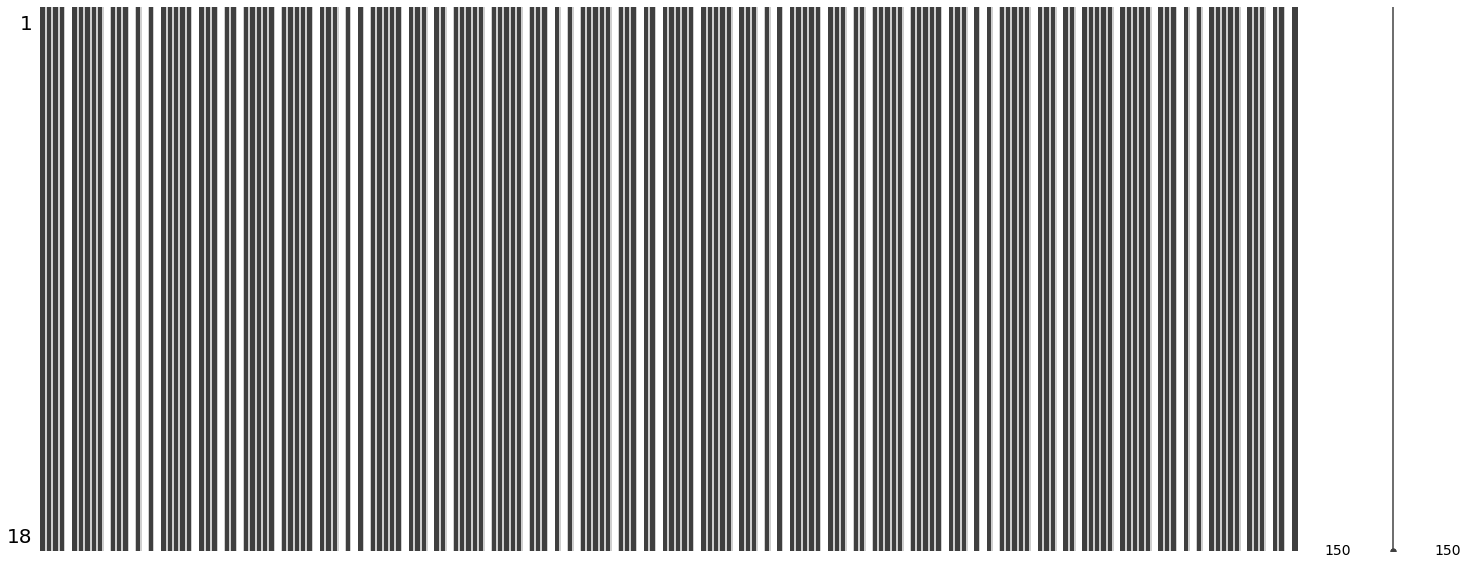

In [ ]:
msno.matrix(cotacoes_IBOV)

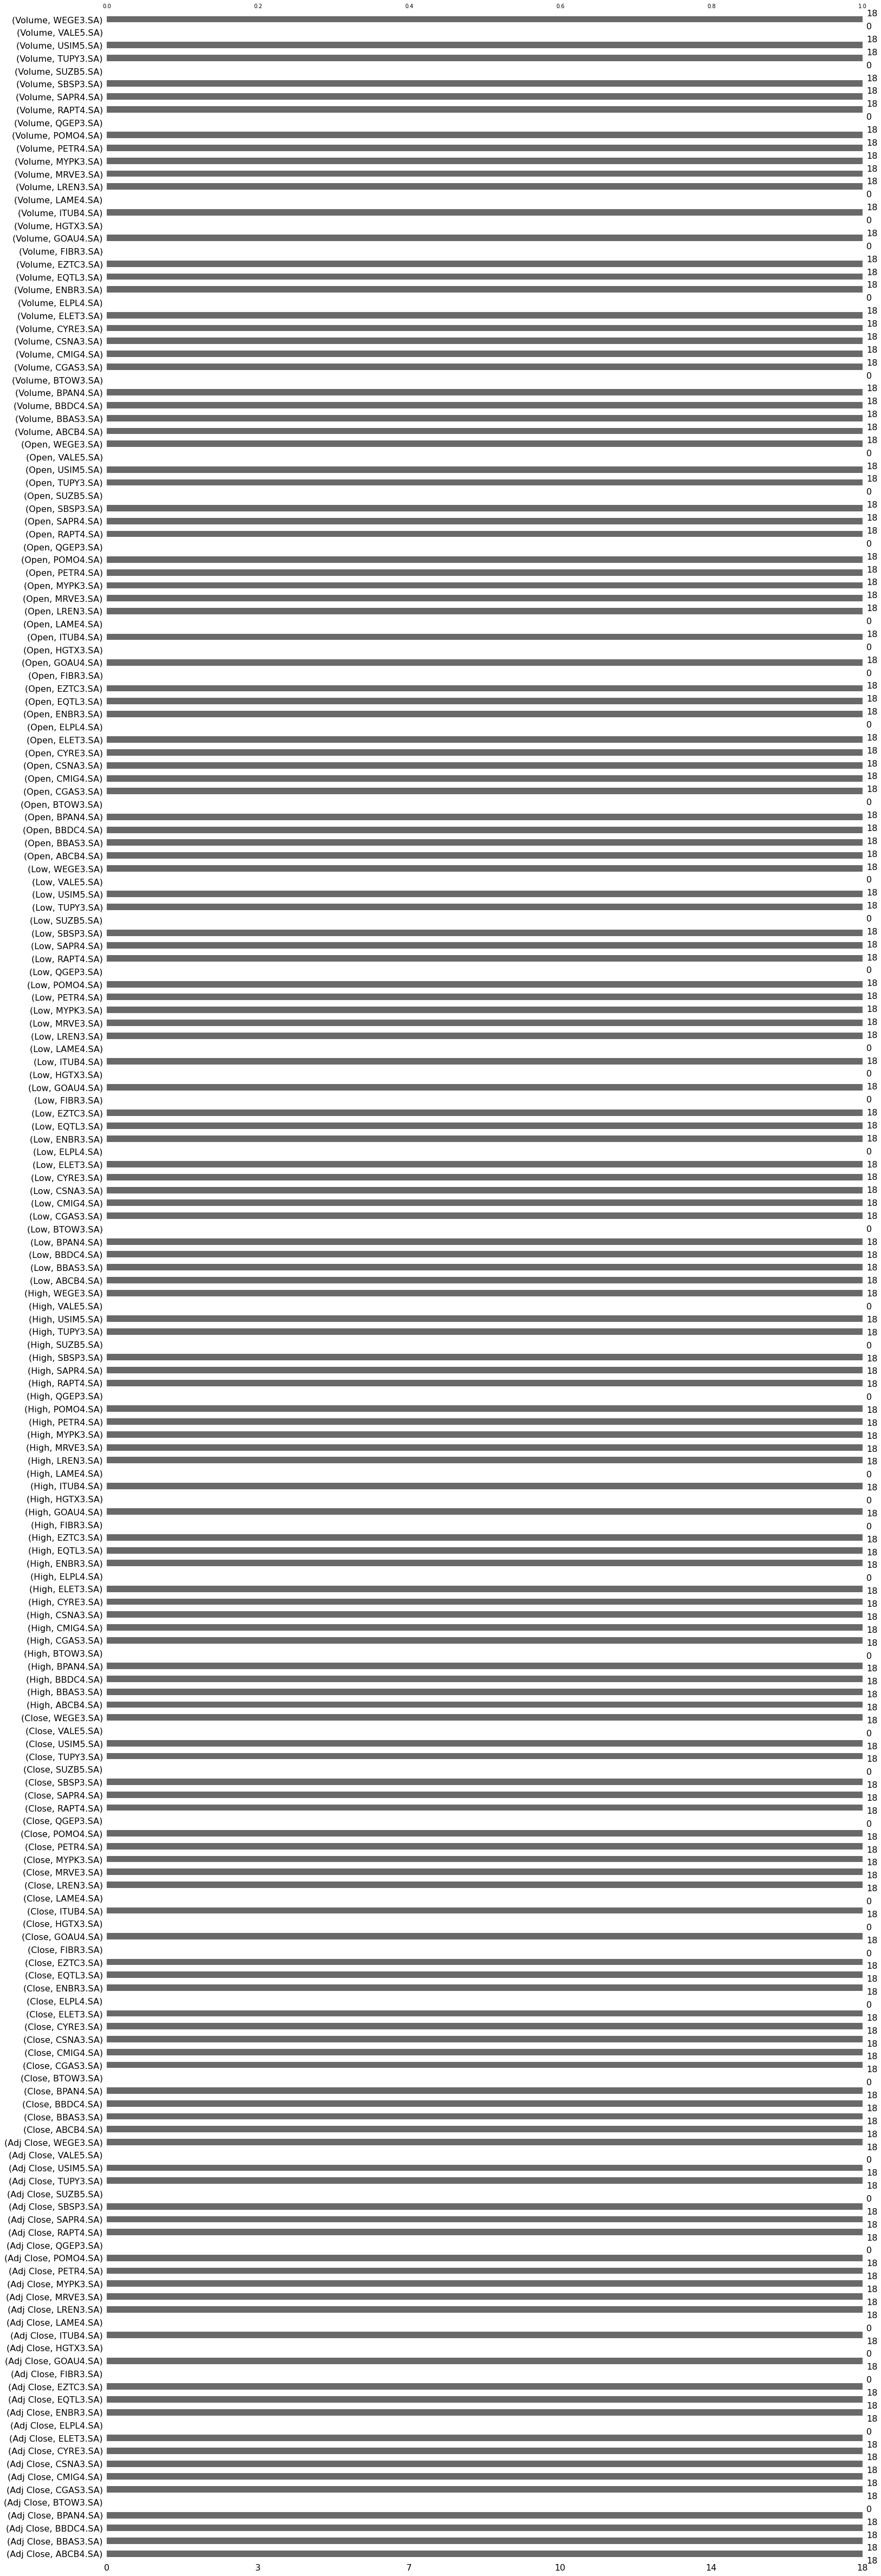

In [ ]:
msno.bar(cotacoes_IBOV)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


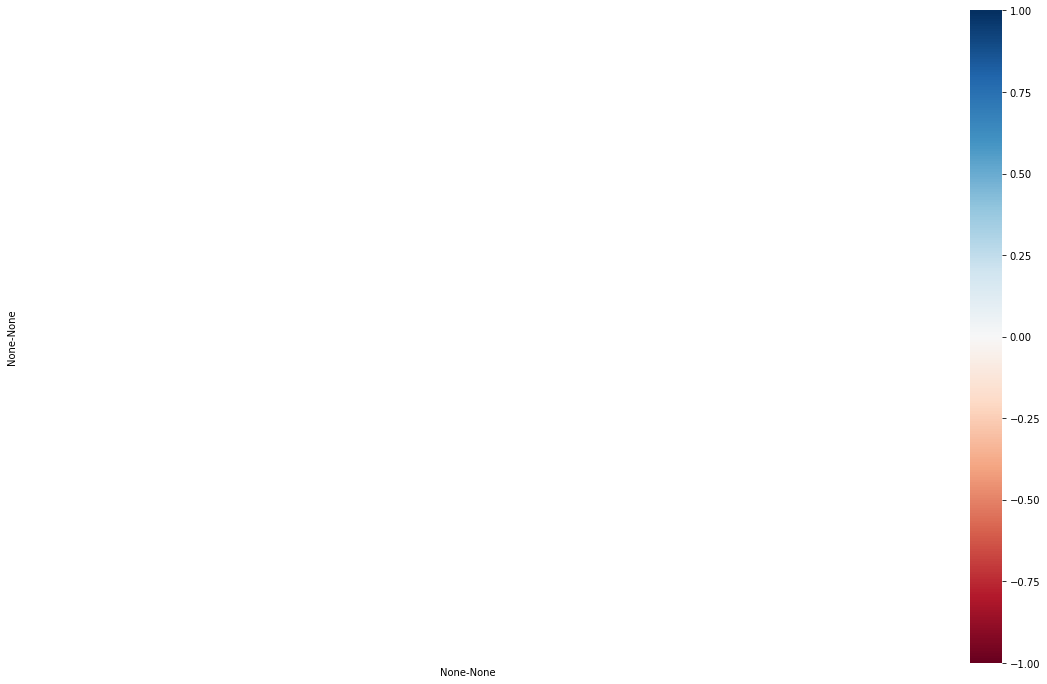

In [ ]:
# Exibe a correlação entre o número de missings
# em diferentes colunas como um mapa de calor(heatmap)

msno.heatmap(cotacoes_IBOV)

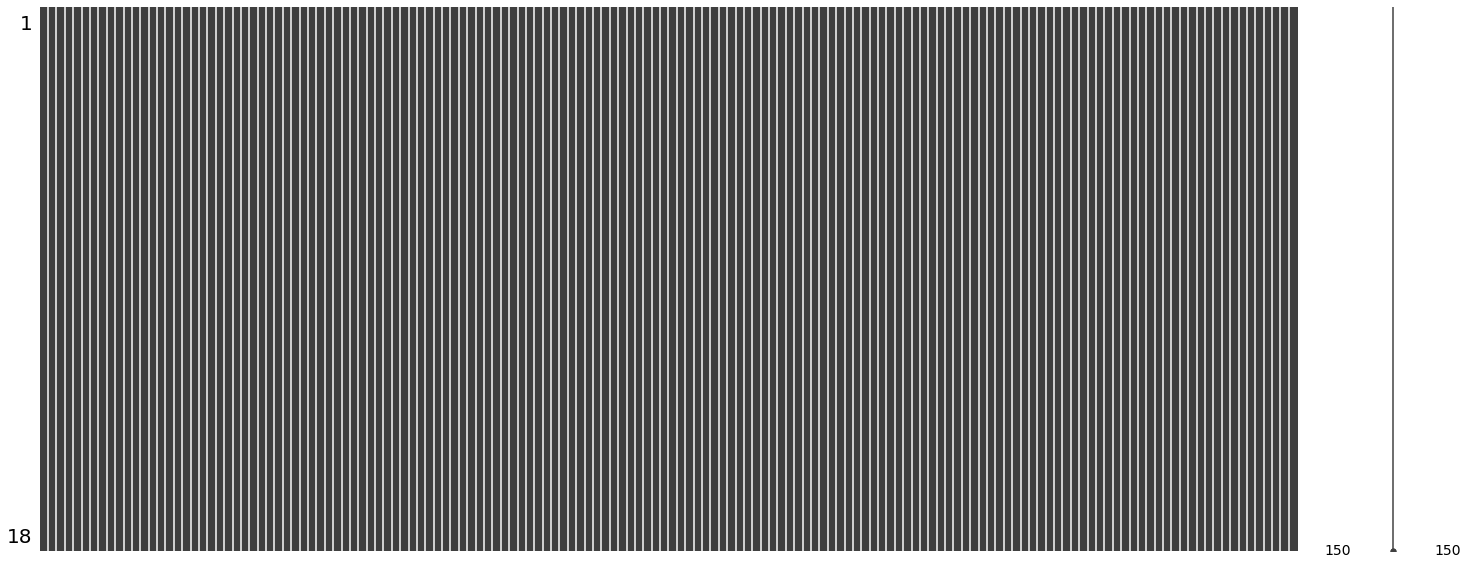

In [ ]:
msno.matrix(cotacoes_IBOV_filter_NA)

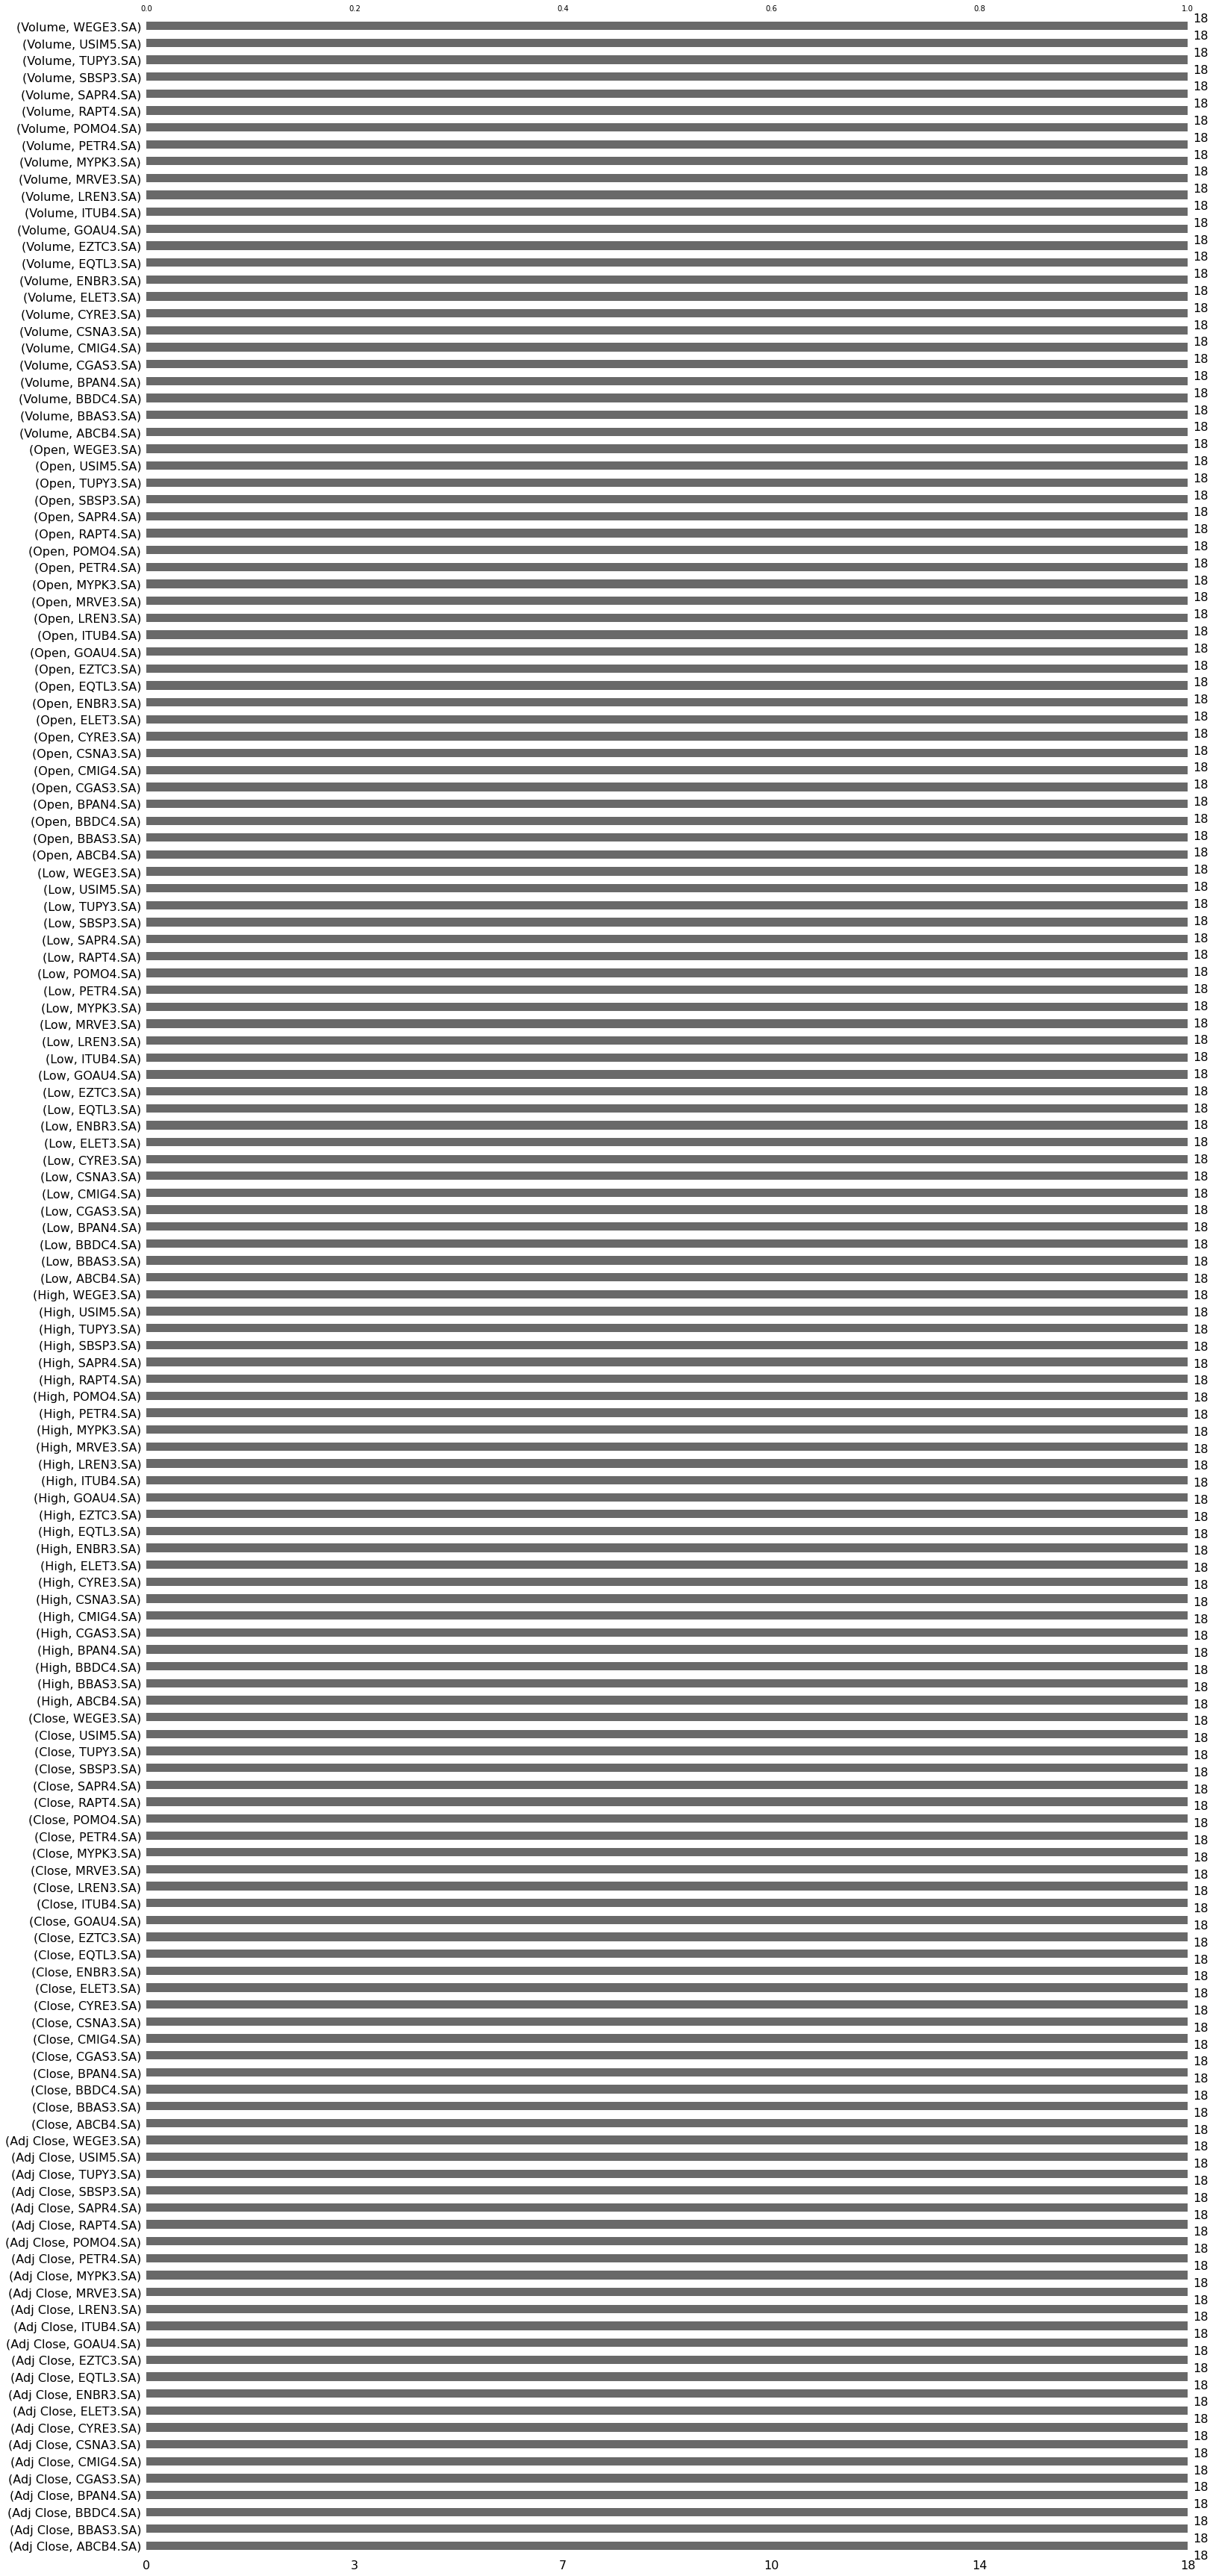

In [ ]:
msno.bar(cotacoes_IBOV_filter_NA)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


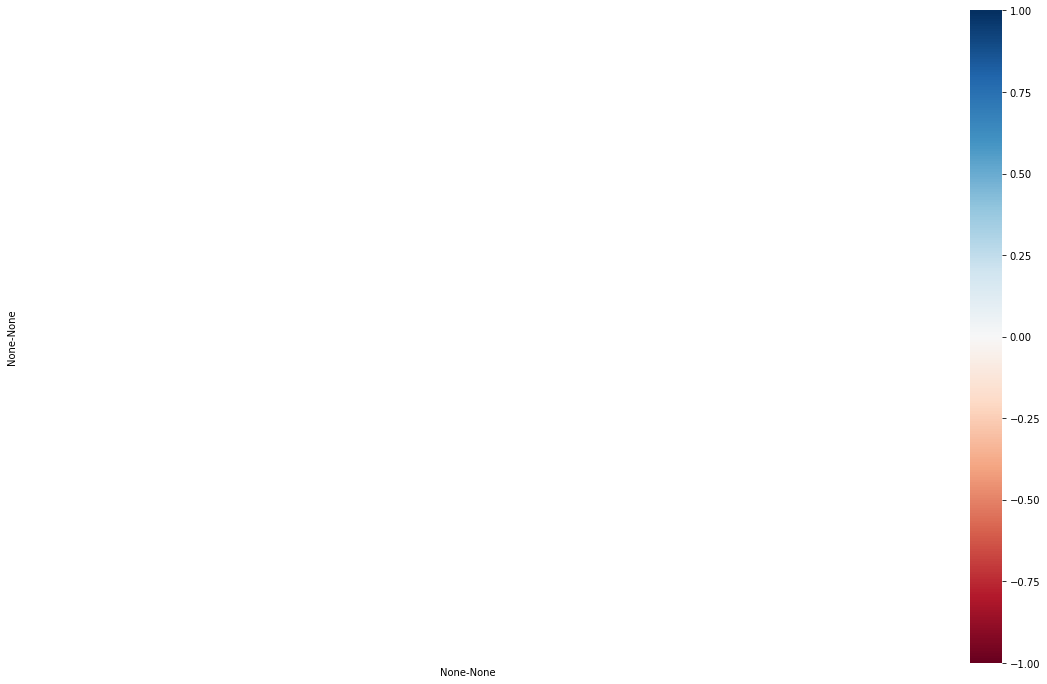

In [ ]:
msno.heatmap(cotacoes_IBOV_filter_NA)

In [ ]:
dados=pd.read_csv('Bovespa.csv')
dados.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [ ]:
acao = 'CYRE3'

In [ ]:
dados.index = pd.to_datetime(dados.Date)

In [ ]:
CYRE = dados[acao]

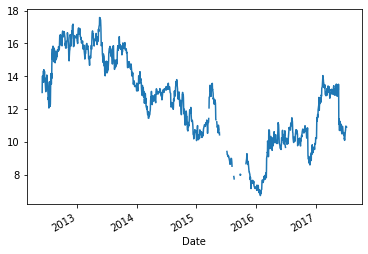

In [ ]:
CYRE.plot()

In [ ]:
CYRE = pd.DataFrame(CYRE)
CYRE2 = CYRE.ffill(axis = 0)

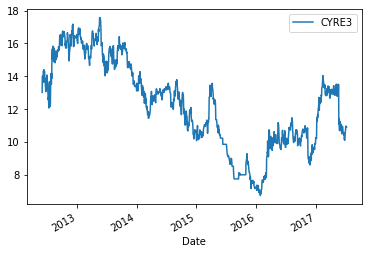

In [ ]:
CYRE2.plot()

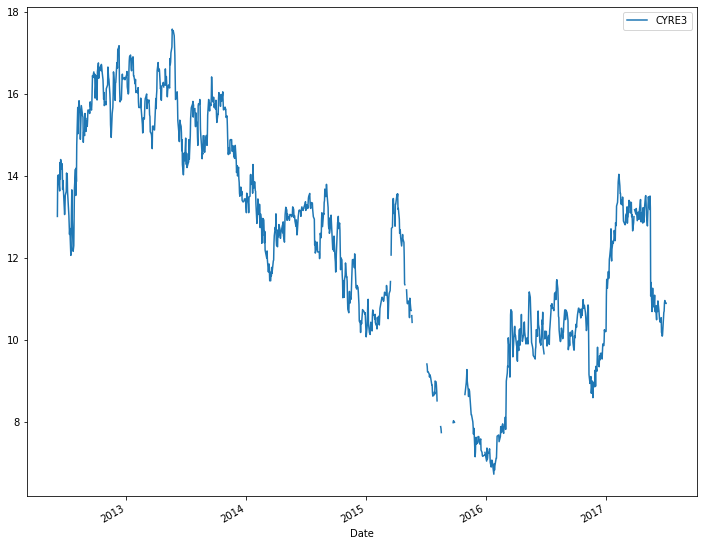

In [ ]:
CYRE.plot(figsize = (12,10))

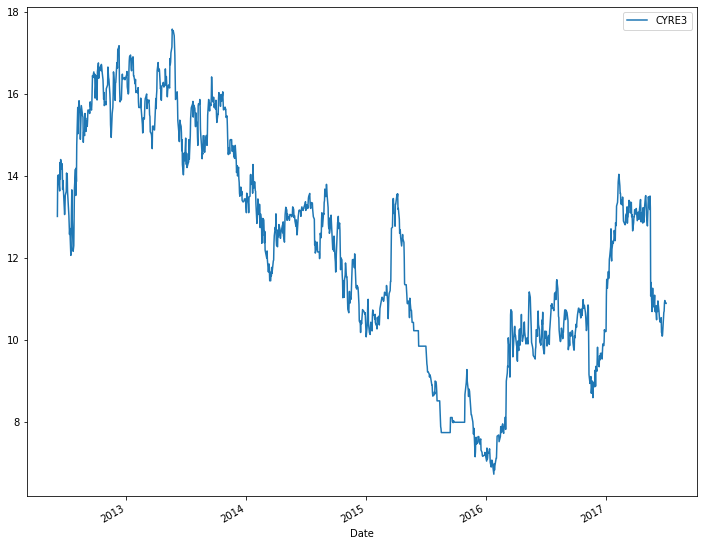

In [ ]:
CYRE2.plot(figsize = (12,10))

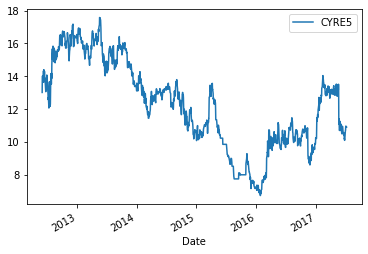

In [ ]:
CYRE2.columns = ['CYRE5']
CYRE2.plot()

In [ ]:
acao ='WEGE3'
weg = dados[acao]

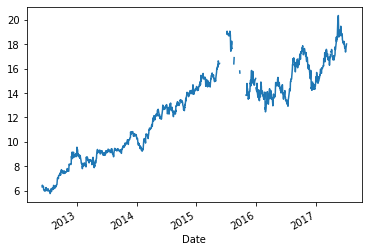

In [ ]:
weg.plot();

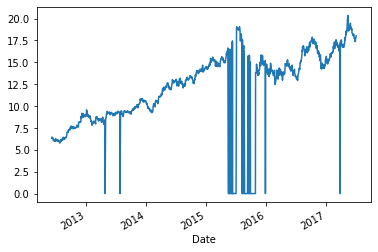

In [ ]:
# Embora não recomendado para aplicações de mercado financeiro, uma opção é o preenchimento com zero

#weg.fillna(0)
weg.fillna(0).plot()

In [ ]:
preco_medio = weg.mean()

In [ ]:
weg.fillna(preco_medio, inplace = True)

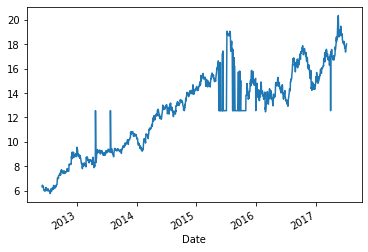

In [ ]:
weg.plot();